<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

### This project aims to identify the lowest participation rate of both ACT and SAT for both year 2017 and 2018 across the US states as well as suggesting recommendations to increase the participation rate of ACT and SAT.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

Work with 4 files: sat_2017.csv, act_2017.csv, sat_2018.csv, act_2018.csv.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def cal_mean(values):

    total = sum(values)
    mean = total / len(values)
    
    return mean


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def cal_standard_deviation(values):
    if isinstance(values[0], str):
        values = convert_str_num(values)

    mean = cal_mean(values)
    list_deviation = [(mean - value)**2 for value in values]
    total_deviation = sum(list_deviation)
    standard_deviation = (total_deviation / len(values))**0.5
    return standard_deviation

def convert_str_num(list_string):
    str_to_float_list = [float(string.replace('x', '')) for string in list_string]     
    return str_to_float_list


3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def normalize_percentage(list_string):

    str_to_float_list = [float(string.replace('%', '')) / 100 for string in list_string]     
    return str_to_float_list


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

## ACT and SAT Data Import and Cleaning

### 1. Display the first 5 rows of the imported data

#### i. Use head() to show the first 5 rows

In [5]:
# Code:
data_act_2017 = pd.read_csv('../data/act_2017.csv')
data_act_2018 = pd.read_csv('../data/act_2018.csv')
data_sat_2017 = pd.read_csv('../data/sat_2017.csv')
data_sat_2018 = pd.read_csv('../data/sat_2018.csv')

In [6]:
data_act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [7]:
data_act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [8]:
data_sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [9]:
data_sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


### 2. Check for any missing values

#### i. Use info() to check that all the columns have the same number of outputs

In [10]:
data_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [11]:
data_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [12]:
data_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
data_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


### 3. Check for any obvious issue with the observation

#### i. Use describe() to take a look at the maximum and minimum values for each of the subjects in ACT
#### ii. Composite for ACT 2017 dataset is object type, hence need to change to float type, this will be done in Step 4
#### iii. Mean science score for 'Maryland' state for ACT 2017 dataset is way too low at 2.3. The score should be changed to 23.2 according to the score provided online. ([*source*](https://nces.ed.gov/programs/digest/d17/tables/dt17_226.60.asp))
#### iv. Math score for 'Maryland' state falls out of the SAT score range of 200 to 800 and does not tally to the total score. The score should be change to 524 instead of 52 stated in the SAT 2017 dataset ([*source*](https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf-0))

In [14]:
data_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [15]:
data_act_2017[data_act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [16]:
data_act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [17]:
data_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [18]:
data_sat_2017[data_sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [19]:
data_sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


### 4. Fix error in steps 2 and 3

### ACT 2017 Dataset

#### i. Remove the 'National' state from the ACT 2017
#### ii. Change all the State name to Pascal Case for consistency
#### iii. Change the value of Science score to 23.2 for Maryland in ACT 2017 dataset
#### iv. Convert the all Composite column to float type instead of object as well as changing the 'Wyoming' state composite value from 20.2x to 20.2 for ACT 2017 dataset ([*source*](https://nces.ed.gov/programs/digest/d17/tables/dt17_226.60.asp))
#### v. Convert the 'Participate' rate from string to float normalized participation rate to be used for comparison

In [20]:
# drop the first index which is the National state
data_act_2017.drop(data_act_2017.index[0], axis=0, inplace=True)

# change state name to all caps for first letter
data_act_2017['State'] = [state.title() for state in data_act_2017['State']]

# change value of science score for Maryland to 23.2 in ACT 2017 dataset
data_act_2017.loc[data_act_2017['Science'] == 2.3, 'Science'] = 23.2

# convert the composite column type to float and 
# change 'Wyoming' state composite value from 20.2x to 20.2, data type from object to float
data_act_2017['Composite'] = convert_str_num(data_act_2017['Composite'])

# convert the Participation rate to the normalized value, data type from object to float
data_act_2017['Participation'] = normalize_percentage(data_act_2017['Participation'])

# reset the index after removing National from the dataset
data_act_2017 = data_act_2017.reset_index(drop=True)
# data_act_2017.sort_values('Participation_Normalized', ascending=False, inplace=False).head()

### ACT 2018 Dataset

#### i. Remove the duplicate 'Maine' state from the ACT 2018
#### ii. Change all the State name to Pascal Case for consistency
#### iii. Convert the 'Participate' rate from string to float normalized participation rate to be used for comparison

In [21]:
# drop the duplicate Maine from ACT 2018 dataset
data_act_2018.drop(data_act_2018.index[19], axis=0, inplace=True)

# change state name to all caps for first letter
data_act_2018['State'] = [state.title() for state in data_act_2018['State']]

# convert the Participation rate to the normalized value, data type from object to float
data_act_2018['Participation'] = normalize_percentage(data_act_2018['Participation'])

# reset the index after removing Maine from the dataset
data_act_2018 = data_act_2018.reset_index(drop=True)

# data_act_2018.sort_values('Participation_Normalized', ascending=False).head()

### SAT 2017 Dataset

#### i. Change the value of Math score to 524 in SAT 2017 dataset found previously in Step 3
#### ii. Change all the State name to Pascal Case for consistency
#### iii. Convert the 'Participate' rate from string to float normalized participation rate to be used for comparison

In [22]:
# change the value of the Math score in SAT 2017 dataset to 524 found previously in Step 3
data_sat_2017.loc[data_sat_2017['Math'] == 52, 'Math'] = 524

# change state name to all caps for first letter
data_sat_2017['State'] = [state.title() for state in data_sat_2017['State']]

# convert the Participation rate to the normalized value, data type from object to float
data_sat_2017['Participation'] = normalize_percentage(data_sat_2017['Participation'])

### SAT 2018 Dataset

#### i. Change the value of Math score to 524 in SAT 2017 dataset found previously in Step 3
#### ii. Change all the State name to Pascal Case for consistency
#### iii. Convert the 'Participate' rate from string to float normalized participation rate to be used for comparison

In [23]:
# change state name to all caps for first letter
data_sat_2018['State'] = [state.title() for state in data_sat_2018['State']]

# convert the Participation rate to the normalized value, data type from object to float
data_sat_2018['Participation'] = normalize_percentage(data_sat_2018['Participation'])

### 4. Display the data type of each feature

#### i. Use info() to display the data type of each feature in the ACT dataset for 2017 and 2018
#### ii. From the information, it shows that all 4 datasets have the same number of rows which can be merged together

In [24]:
data_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   English        51 non-null     float64
 3   Math           51 non-null     float64
 4   Reading        51 non-null     float64
 5   Science        51 non-null     float64
 6   Composite      51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [25]:
data_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   Composite      51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [26]:
data_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [27]:
data_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


### 5. Rename Columns

#### i. Define a function to rename all columns in ACT 2017 and 2018 datasets to lower-case
#### ii. Function takes in dataframe and year argument
#### iii. Use df.columns to check that the columns have been change to lowercase

In [28]:
# change col of df to lowercase
def change_col_lower(df, test, year):
    for col in df.columns:
        
        if col == 'Evidence-Based Reading and Writing':
            df = df.rename(columns={col: f'erw_{test}_{year}'})
        elif col == 'Participation':
            df = df.rename(columns={col: f'part_{test}_{year}'})
        elif col != 'State':
            df = df.rename(columns={col: f'{col.lower()}_{test}_{year}'}) 
        else:
            df = df.rename(columns={col: f'{col.lower()}'})
    return df

In [29]:
data_act_2017 = change_col_lower(data_act_2017, 'act', 2017)

In [30]:
data_act_2018 = change_col_lower(data_act_2018, 'act', 2018)

In [31]:
data_sat_2017 = change_col_lower(data_sat_2017, 'sat', 2017)

In [32]:
data_sat_2018 = change_col_lower(data_sat_2018, 'sat', 2018)

In [33]:
data_act_2017.columns

Index(['state', 'part_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')

In [34]:
data_act_2018.columns

Index(['state', 'part_act_2018', 'composite_act_2018'], dtype='object')

In [35]:
data_sat_2017.columns

Index(['state', 'part_sat_2017', 'erw_sat_2017', 'math_sat_2017',
       'total_sat_2017'],
      dtype='object')

In [36]:
data_sat_2018.columns

Index(['state', 'part_sat_2018', 'erw_sat_2018', 'math_sat_2018',
       'total_sat_2018'],
      dtype='object')

### 6. Merge both SAT and ACT dataset for both 2017 and 2018 as one csv file

#### Merge 2 ACT dataset together as one csv file first
#### i. Use merge() to merge 2 dataframes together
#### ii. Use info() to check merged dataframes consist the required columns
#### iii. Save the merged dataset to a csv file

In [37]:
merged_act = pd.merge(data_act_2017, data_act_2018, how='left', on='state')

In [38]:
merged_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               51 non-null     object 
 1   part_act_2017       51 non-null     float64
 2   english_act_2017    51 non-null     float64
 3   math_act_2017       51 non-null     float64
 4   reading_act_2017    51 non-null     float64
 5   science_act_2017    51 non-null     float64
 6   composite_act_2017  51 non-null     float64
 7   part_act_2018       51 non-null     float64
 8   composite_act_2018  51 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.0+ KB


In [39]:
merged_act.to_csv('../data/act_score_2017_2018.csv')

#### Merge 2 SAT dataset together as one csv file first
#### i. Use merge() to merge 2 dataframes together
#### ii. Use info() to check merged dataframes consist the required columns
#### iii. Save the merged dataset to a csv file

In [40]:
merged_sat = pd.merge(data_sat_2017, data_sat_2018, how='left', on='state')

In [41]:
merged_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   part_sat_2017   51 non-null     float64
 2   erw_sat_2017    51 non-null     int64  
 3   math_sat_2017   51 non-null     int64  
 4   total_sat_2017  51 non-null     int64  
 5   part_sat_2018   51 non-null     float64
 6   erw_sat_2018    51 non-null     int64  
 7   math_sat_2018   51 non-null     int64  
 8   total_sat_2018  51 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.0+ KB


In [42]:
merged_sat.to_csv('../data/sat_score_2017_2018.csv')

#### Finally, merge the merged SAT and merged ACT together as one csv file
#### ii. Use info() to check merged dataframes consist the required columns
#### iii. Save the merged dataset to a csv file

In [43]:
merged_act_sat = pd.merge(merged_act, merged_sat, how='left', on='state')

In [44]:
merged_act_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               51 non-null     object 
 1   part_act_2017       51 non-null     float64
 2   english_act_2017    51 non-null     float64
 3   math_act_2017       51 non-null     float64
 4   reading_act_2017    51 non-null     float64
 5   science_act_2017    51 non-null     float64
 6   composite_act_2017  51 non-null     float64
 7   part_act_2018       51 non-null     float64
 8   composite_act_2018  51 non-null     float64
 9   part_sat_2017       51 non-null     float64
 10  erw_sat_2017        51 non-null     int64  
 11  math_sat_2017       51 non-null     int64  
 12  total_sat_2017      51 non-null     int64  
 13  part_sat_2018       51 non-null     float64
 14  erw_sat_2018        51 non-null     int64  
 15  math_sat_2018       51 non-null     int64  
 16  total_sat_

In [45]:
merged_act_sat.to_csv('../data/act_sat_score_2017_2018.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

### 7. Import the merged SAT and ACT dataset for Exploratory Data Analysis (EDA)

#### i. Drop the Unnamed: 0 column in the dataframe

In [46]:
# markup for table format
# |Feature|Type|Dataset|Description|
# |---|---|---|---|
# |column/feature|int/float/object|SAT/ACT|This is an example| 

# import the merged sat and cat data
final = pd.read_csv('../data/act_sat_score_2017_2018.csv')

In [47]:
final.describe()

,Unnamed: 0,part_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,part_act_2018,composite_act_2018,part_sat_2017,erw_sat_2017,math_sat_2017,total_sat_2017,part_sat_2018,erw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.000000,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.617255,21.496078,0.398039,569.117647,556.882353,1126.098039,0.457451,563.686275,556.235294,1120.019608
std,14.866069,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.340371,2.111583,0.352766,45.666901,47.121395,92.494812,0.373143,47.502627,47.772623,94.155083
min,0.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.070000,17.700000,0.020000,482.000000,468.000000,950.000000,0.020000,480.000000,480.000000,977.000000
25%,12.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.285000,19.950000,0.040000,533.500000,523.500000,1055.500000,0.045000,534.500000,522.500000,1057.500000
50%,25.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.660000,21.300000,0.380000,559.000000,548.000000,1107.000000,0.520000,552.000000,544.000000,1098.000000
75%,37.500000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,1.000000,23.650000,0.660000,613.000000,599.000000,1212.000000,0.775000,610.500000,593.500000,1204.000000
max,50.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,25.600000,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000


In [48]:
final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [49]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               51 non-null     object 
 1   part_act_2017       51 non-null     float64
 2   english_act_2017    51 non-null     float64
 3   math_act_2017       51 non-null     float64
 4   reading_act_2017    51 non-null     float64
 5   science_act_2017    51 non-null     float64
 6   composite_act_2017  51 non-null     float64
 7   part_act_2018       51 non-null     float64
 8   composite_act_2018  51 non-null     float64
 9   part_sat_2017       51 non-null     float64
 10  erw_sat_2017        51 non-null     int64  
 11  math_sat_2017       51 non-null     int64  
 12  total_sat_2017      51 non-null     int64  
 13  part_sat_2018       51 non-null     float64
 14  erw_sat_2018        51 non-null     int64  
 15  math_sat_2018       51 non-null     int64  
 16  total_sat_

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final|State name| 
|part_act_2017|float|final|Normalized participation rate for ACT 2017| 
|english_act_2017|float|final|Average English score for ACT 2017| 
|math_act_2017|float|final|Average Math score for ACT 2017| 
|reading_act_2017|float|final|Average Reading score for ACT 2017| 
|science_act_2017|float|final|Average Science score for ACT 2017| 
|composite_act_2017|float|final|Average Composite score for ACT 2017| 
|part_act_2018|float|final|Normalized participation rate for ACT 2018| 
|english_act_2018|float|final|Average English score for ACT 2018| 
|math_act_2018|float|final|Average Math score for ACT 2018| 
|reading_act_2018|float|final|Average Reading score for ACT 2018| 
|science_act_2018|float|final|Average Science score for ACT 2018| 
|composite_act_2018|float|final|Average Composite score for ACT 2018|
|part_sat_2017|float|final|Normalized participation rate for SAT 2017| 
|erw_sat_2017|int|final|Average Evidence-based Reading and Writing score for SAT 2017| 
|math_sat_2017|int|final|Average Math score for SAT 2017| 
|total_sat_2017|int|final|Average Total score for SAT 2017|
|part_sat_2018|float|final|Normalized participation rate for SAT 2018| 
|erw_sat_2018|int|final|Average Evidence-based Reading and Writing score for SAT 2018| 
|math_sat_2018|int|final|Average Math score for SAT 2018| 
|total_sat_2018|int|final|Average Total score for SAT 2018|



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 1. Summary statistics

In [275]:
# Summary statistics using describe function to transposed the df for easier reference
final.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
part_act_2017,51.0,0.65,0.32,0.08,0.31,0.69,1.00,1.0
english_act_2017,51.0,20.93,2.35,16.30,19.00,20.70,23.30,25.5
math_act_2017,51.0,21.18,1.98,18.00,19.40,20.90,23.10,25.3
reading_act_2017,51.0,22.01,2.07,18.10,20.45,21.80,24.15,26.0
science_act_2017,51.0,21.45,1.74,18.20,19.95,21.30,23.20,24.9
composite_act_2017,51.0,21.52,2.02,17.80,19.80,21.40,23.60,25.5
part_act_2018,51.0,0.62,0.34,0.07,0.29,0.66,1.00,1.0
composite_act_2018,51.0,21.50,2.11,17.70,19.95,21.30,23.65,25.6
part_sat_2017,51.0,0.40,0.35,0.02,0.04,0.38,0.66,1.0
erw_sat_2017,51.0,569.12,45.67,482.00,533.50,559.00,613.00,644.0


### Observations:
From the summary statistics, it is observable that the participation rate for ACT is higher than that of SAT for both 2017 and 2018. We can also observe that the SAT participation rate at the 25%, 50% and 75% is significantly lower than the ACT participation rate.

### 2. Use dictionary comprehension to apply the standard deviation function to the imported dataset

In [51]:
#Code:
sd = {k: cal_standard_deviation(v) for k, v in final.items() if k != 'state'} 
sd

{'part_act_2017': 0.3182417575123181,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 1.7222161451443676,
 'composite_act_2017': 2.000786081581989,
 'part_act_2018': 0.33701735820410317,
 'composite_act_2018': 2.090779082141178,
 'part_sat_2017': 0.3492907076664507,
 'erw_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'part_sat_2018': 0.3694661922353942,
 'erw_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433}

### Observations:
When we compare the standard deviation with the dataset, the standard deviation is slightly different as we used the population standard deivation formula to calculate the standard deviation. By using the function below, which is the sample standard deviation formula, we are able to get the same value as the dataset.

In [276]:
def cal_standard_deviation_sample(values):
    if isinstance(values[0], str):
        values = convert_str_num(values)

    mean = cal_mean(values)
    list_deviation = [(mean - value)**2 for value in values]
    total_deviation = sum(list_deviation)
    standard_deviation = (total_deviation / (len(values)-1))**0.5
    return standard_deviation

sd_sample = {k: round(cal_standard_deviation_sample(v),2) for k, v in final.items() if k != 'state'}
sd_sample

{'part_act_2017': 0.32,
 'english_act_2017': 2.35,
 'math_act_2017': 1.98,
 'reading_act_2017': 2.07,
 'science_act_2017': 1.74,
 'composite_act_2017': 2.02,
 'part_act_2018': 0.34,
 'composite_act_2018': 2.11,
 'part_sat_2017': 0.35,
 'erw_sat_2017': 45.67,
 'math_sat_2017': 47.12,
 'total_sat_2017': 92.49,
 'part_sat_2018': 0.37,
 'erw_sat_2018': 47.5,
 'math_sat_2018': 47.77,
 'total_sat_2018': 94.16}

### 2. Investigate the trends in data

### Highest and Lowest participation rate for ACT 2017 and 2018

In [288]:
# Highest participation rate for ACT 2017 and 2018
print(final.loc[final['part_act_2017'] == final['part_act_2017'].max(), ['state', 'part_act_2017']].head())
print(final[['state', 'part_act_2018']].sort_values(by='part_act_2018', ascending=False).head())

        state  part_act_2017
0     Alabama            1.0
3    Arkansas            1.0
5    Colorado            1.0
17   Kentucky            1.0
18  Louisiana            1.0
        state  part_act_2018
0     Alabama            1.0
17   Kentucky            1.0
49  Wisconsin            1.0
44       Utah            1.0
42  Tennessee            1.0


In [291]:
print(final.loc[:,['state', 'part_act_2017']].sort_values(by='part_act_2017').head())
print(final.loc[:,['state', 'part_act_2018']].sort_values(by='part_act_2018').head())

            state  part_act_2017
19          Maine           0.08
29  New Hampshire           0.18
7        Delaware           0.18
39   Rhode Island           0.21
38   Pennsylvania           0.23
            state  part_act_2018
19          Maine           0.07
39   Rhode Island           0.15
29  New Hampshire           0.16
7        Delaware           0.17
38   Pennsylvania           0.20


In [91]:
final[['state', 'part_act_2017']].sort_values(by='part_act_2017').head()

,state,part_act_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [112]:
act_2017 = final.loc[final['part_act_2017'] < 0.5, ['state', 'part_act_2017']].sort_values(by='part_act_2017')
act_2017

,state,part_act_2017
19,Maine,0.08
7,Delaware,0.18
29,New Hampshire,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
22,Michigan,0.29
45,Vermont,0.29
46,Virginia,0.29
47,Washington,0.29


In [97]:
final.loc[final['part_act_2018'] == final['part_act_2017'].max(), ['state', 'part_act_2018']]

,state,part_act_2018
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


In [113]:
act_2018 = final.loc[final['part_act_2018'] < 0.5, ['state', 'part_act_2018']].sort_values(by='part_act_2018')
act_2018

,state,part_act_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


In [117]:
act_2018.agg('count') - act_2017.agg('count')

part_act_2017    NaN
part_act_2018    NaN
state            3.0
dtype: float64

### Observations: 
The codes above show the highest and lowest participation rate of the states in US. Sorting of the dataframe by using the boolean filtering is used to find the maximum participation rate as there were several states in the US which had 100% participation rate (in our case, we normalized the participation rate to 1) for ACT in 2017 and 2018. 
To find the minimum participation rate, sorting the dataframe by a columns was used as we can specify the number of rows that we want to show. This is a better approach for showing the minimum participation rate because we would not know what the lowest participation rate would, hence by using the filtering by the minimum participation rate would only give us one row. Although by filtering with a condition like (final['part_act_2018'] < specific participation rate), we could not be sure that it will filter out the number of rows that we want without looking at the data and then set the condition to be used for filtering.

From the results above, we are actually more interested in the states that had less than 50% participation rate for ACT in 2017 and 2018 to explore how we can improve their participation rate. We can see from the code above that 3 more states had a participation rate less than 50% in 2018 than 2017. This project will suggest recommendations to improve the participation rate for these states.

### Highest and Lowest participation rate for SAT 2017 and 2018

In [71]:
final.loc[final['part_sat_2017'] == final['part_sat_2017'].max(), ['state', 'part_sat_2017']]

,state,part_sat_2017
6,Connecticut,1.0
7,Delaware,1.0
8,District Of Columbia,1.0
22,Michigan,1.0


In [94]:
final[['state', 'part_sat_2017']].sort_values(by='part_sat_2017').head()

,state,part_sat_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [73]:
final.loc[final['part_sat_2018'] == final['part_sat_2018'].max(), ['state', 'part_sat_2018']]

,state,part_sat_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
12,Idaho,1.0
22,Michigan,1.0


In [90]:
final[['state', 'part_sat_2018']].sort_values(by='part_sat_2018').head(10)

,state,part_sat_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


In [ ]:
# Investigate trends in the data.
# Using sorting and/or masking (along with the .head() 
# method to avoid printing our entire dataframe), consider questions relevant to your problem statement. 
# Some examples are provided below (but feel free to change these questions for your specific problem):
# Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
# Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
# Do any states with 100% participation on a given test have a rate change year-to-year?
# Do any states show have >50% participation on both tests each year?
# Which colleges have the highest median SAT and ACT scores for admittance?
# Which California school districts have the highest and lowest mean test scores?
# You should comment on your findings at each step in a markdown cell 
# below your code block. Make sure you include at least one example of 
# sorting your dataframe by a column, and one example of 
# using boolean filtering (i.e., masking) to select a subset of the dataframe

In [83]:
final.loc[final['composite_act_2017'] == final['composite_act_2017'].max(), ['state', 'composite_act_2017']]

,state,composite_act_2017
29,New Hampshire,25.5


In [122]:
final.loc[final['composite_act_2017'] == final['composite_act_2017'].min(), ['state', 'composite_act_2017']]

,state,composite_act_2017
28,Nevada,17.8


In [123]:
final.loc[final['composite_act_2018'] == final['composite_act_2018'].max(), ['state', 'composite_act_2018']]

,state,composite_act_2018
6,Connecticut,25.6


In [124]:
final.loc[final['composite_act_2018'] == final['composite_act_2018'].min(), ['state', 'composite_act_2018']]

,state,composite_act_2018
28,Nevada,17.7


In [128]:
final.loc[final['total_sat_2017'] == final['total_sat_2017'].min(), ['state', 'total_sat_2017']]

,state,total_sat_2017
8,District Of Columbia,950


In [129]:
final.loc[final['total_sat_2017'] == final['total_sat_2017'].max(), ['state', 'total_sat_2017']]

,state,total_sat_2017
23,Minnesota,1295


In [126]:
final.loc[final['total_sat_2018'] == final['total_sat_2018'].min(), ['state', 'total_sat_2018']]

,state,total_sat_2018
8,District Of Columbia,977


In [127]:
final.loc[final['total_sat_2018'] == final['total_sat_2018'].max(), ['state', 'total_sat_2018']]

,state,total_sat_2018
23,Minnesota,1298


In [135]:
final[['state', 'part_sat_2017', 'erw_sat_2017', 'math_sat_2017', 'total_sat_2017']].describe()

,part_sat_2017,erw_sat_2017,math_sat_2017,total_sat_2017
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039
std,0.352766,45.666901,47.121395,92.494812
min,0.020000,482.000000,468.000000,950.000000
25%,0.040000,533.500000,523.500000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


In [133]:
final.loc[final['part_sat_2017'] == final['part_sat_2017'].max(), ['state', 'part_sat_2017', 'erw_sat_2017', 'math_sat_2017', 'total_sat_2017']]

,state,part_sat_2017,erw_sat_2017,math_sat_2017,total_sat_2017
6,Connecticut,1.0,530,512,1041
7,Delaware,1.0,503,492,996
8,District Of Columbia,1.0,482,468,950
22,Michigan,1.0,509,495,1005


### Answer:

In [274]:
# sns.displot(
#     x=final['science_act_2017'],
# #     kde=True,
#     kind='kde'
# #     legend='x'
# )

# sns.displot(
#     x=final['math_act_2017'],
# #     kde=True,
#     kind='kde'
# #     legend='y'
# )

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### 1. Seaborn heatmap to visualize correlations between all numeric features

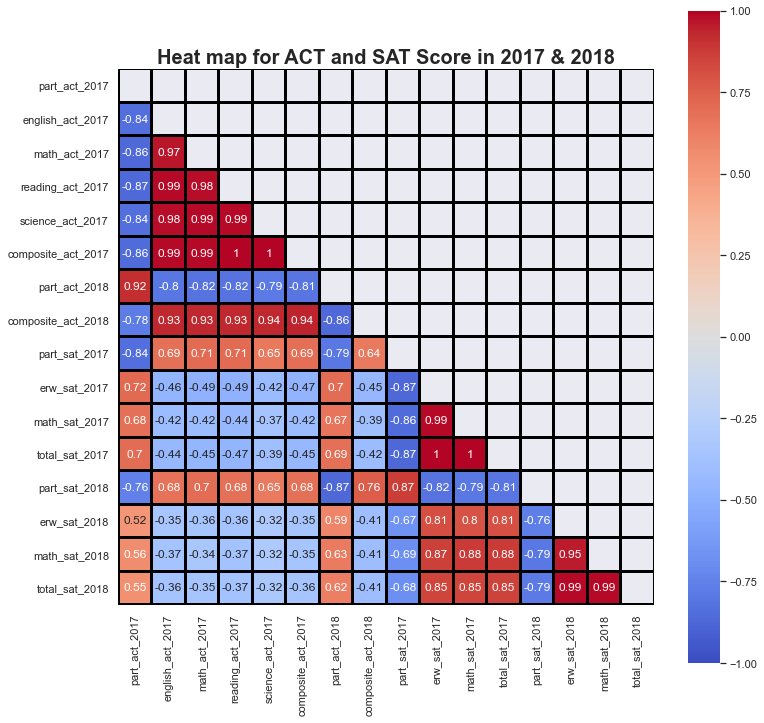

In [139]:
sns.set(rc={'figure.figsize':(12,12)})
# fmt -> normal of decimal place, vmin, vmax, center -> specify the scale range, cmap -> change the color of scale
# cbar_kws={'orientation': 'horizontal'} -> changes the color bar to display horizontally, cbar=False -> no color
# mask -> create a mask/filter on heatmap
# triu(), tril() are numpy methods which return lower and upper triangle of matrix respectively -> assign to mask

heat_map = sns.heatmap(
            final.corr(), 
            annot=True, 
            fmt='.2g', 
            vmin=-1, vmax=1, center=0, 
            cmap='coolwarm',
            linecolor='black', linewidth=2,
            square=True, mask=np.triu(final.corr())
)

heat_map.set_title(
            'Heat map for ACT and SAT Score in 2017 & 2018', 
            fontdict= { 'fontsize': 20, 'fontweight':'bold'}
);

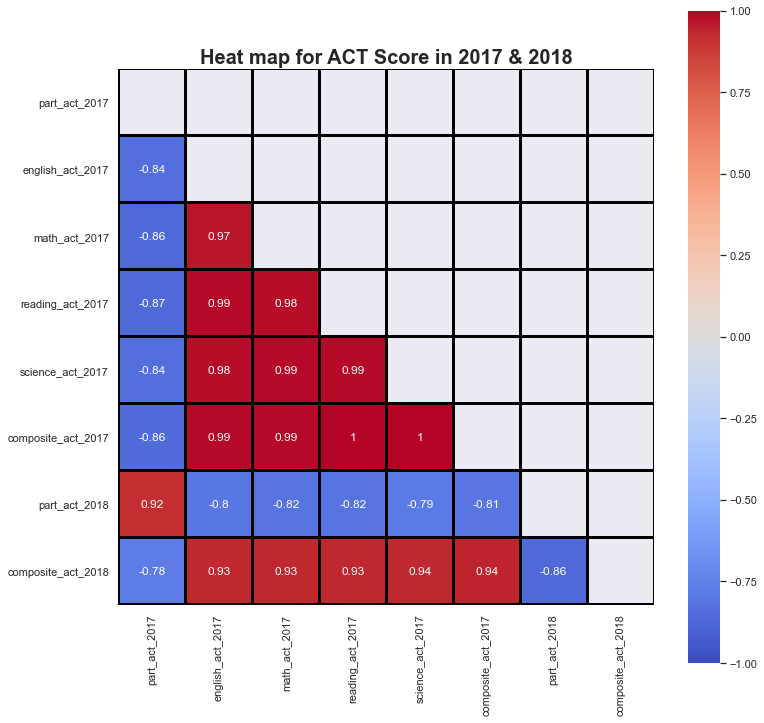

In [260]:
filtered_act = [col for col in final.columns if ('act' in col)] 

heat_map_act = sns.heatmap(
            final[filtered_act].corr(), 
            annot=True, 
            fmt='.2g', 
            vmin=-1, vmax=1, center=0, 
            cmap='coolwarm',
            linecolor='black', linewidth=2,
            square=True, mask=np.triu(final[filtered_act].corr())
)

heat_map_act.set_title(
            'Heat map for ACT Score in 2017 & 2018', 
            fontdict= { 'fontsize': 20, 'fontweight':'bold'}
);

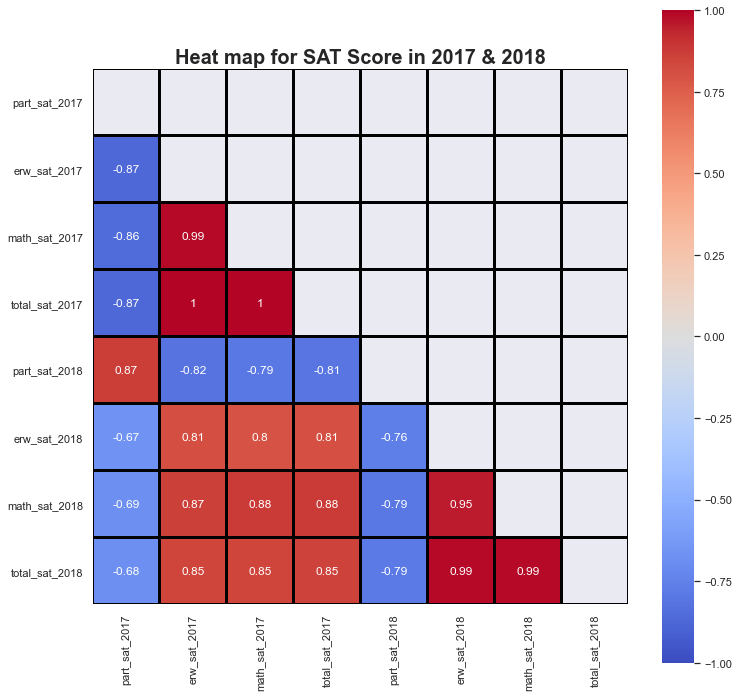

In [262]:
filtered_sat = [col for col in final.columns if ('sat' in col)] 

heat_map_act = sns.heatmap(
            final[filtered_sat].corr(), 
            annot=True, 
            fmt='.2g', 
            vmin=-1, vmax=1, center=0, 
            cmap='coolwarm',
            linecolor='black', linewidth=2,
            square=True, mask=np.triu(final[filtered_sat].corr())
)

heat_map_act.set_title(
            'Heat map for SAT Score in 2017 & 2018', 
            fontdict= { 'fontsize': 20, 'fontweight':'bold'}
);

In [ ]:
# Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
# OPTIONAL: Summarize the underlying distributions of your features (in words & statistics)
# Be thorough in your verbal description of these distributions.
# Be sure to back up these summaries with statistics.
# We generally assume that data we sample from a population will be 
# normally distributed. Do we observe this trend? Explain your answers for 
# each distribution and how you think this will affect estimates made from these data.

### 2. Visualisation using Histogram

In [249]:
# define a function to plot histogram
def histogram_subplot(df, list_columns, list_titles, xlabel):

    # to get number of rows to plot
    rows = int(np.ceil(len(list_columns)/2))
    # to plot n by 2 figures
    fig, ax = plt.subplots(rows,2)
    # ravel() -> flatten
    ax = ax.ravel()
    for index, col in enumerate(list_columns):
        ax[index].hist(df[col])
        ax[index].set_title(list_titles[index], fontdict= { 'fontsize': 15, 'fontweight':'bold'})
        ax[index].set_xlabel(xlabel, fontdict= { 'fontsize': 12, 'fontweight':'bold'})
        ax[index].set_ylabel('Frequency', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
#         sns.kdeplot(data=df, x=col, ax=ax[index])
    plt.tight_layout()

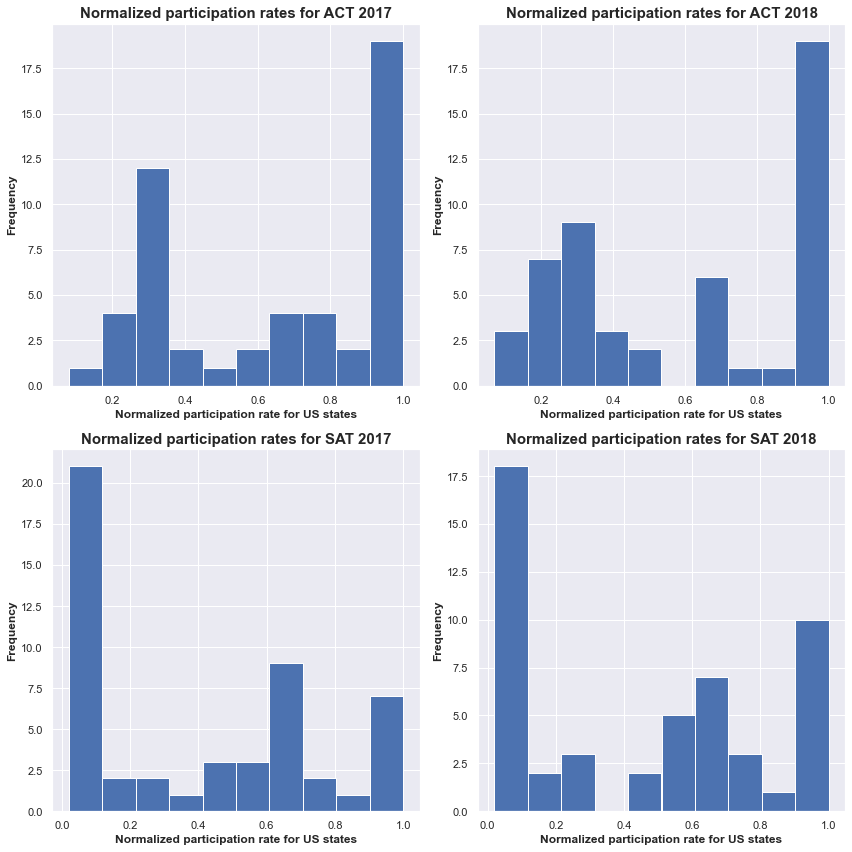

In [252]:
# filtered the column to include onlh participation rate in ACT and SAT
filtered_col_part = [col for col in final.columns if ('part' in col)] 

part_columns = filtered_col_part
part_titles = ["Normalized participation rates for ACT 2017",\
               "Normalized participation rates for ACT 2018",\
               "Normalized participation rates for SAT 2017",\
               "Normalized participation rates for SAT 2018"]
part_xlabel = 'Normalized participation rate for US states'
# pass the dataset, columns, titles and xlabel to the histogram plot function
histogram_subplot(final, part_columns, part_titles, part_xlabel)

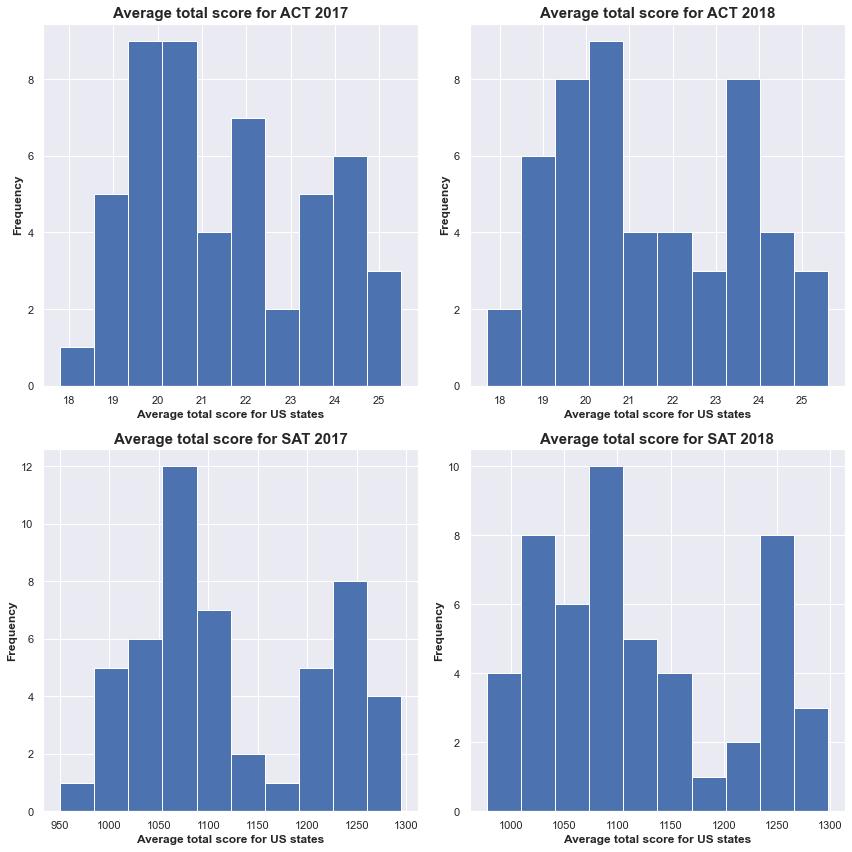

In [236]:
# act_sat_columns = ['composite_act_2017', 'composite_act_2018', 'total_sat_2017','total_sat_2018']
filtered_col_total = [col for col in final.columns if ('total' in col) or ('composite' in col)] 
# filtered_col_total
act_sat_columns = filtered_col_total
act_sat_titles = ['Average total score for ACT 2017',\
                  'Average total score for ACT 2018',\
                  'Average total score for SAT 2017',\
                  'Average total score for SAT 2018']
act_sat_xlabel = 'Average total score for US states'
histogram_subplot(final, act_sat_columns, act_sat_titles, act_sat_xlabel)

In [238]:
def custom_boxplot(df, yvalue, xvalue, plot_title):
    sns.boxplot(
        y=yvalue,
        x=xvalue, 
    #     fontdict= { 'fontsize': 12, 'fontweight':'bold'},
    #     hue='state',
        data=df
    ).set(title=plot_title)
    sns.stripplot(
        y=yvalue,
        x=xvalue,  
    #     hue='state',
        data=df
    )

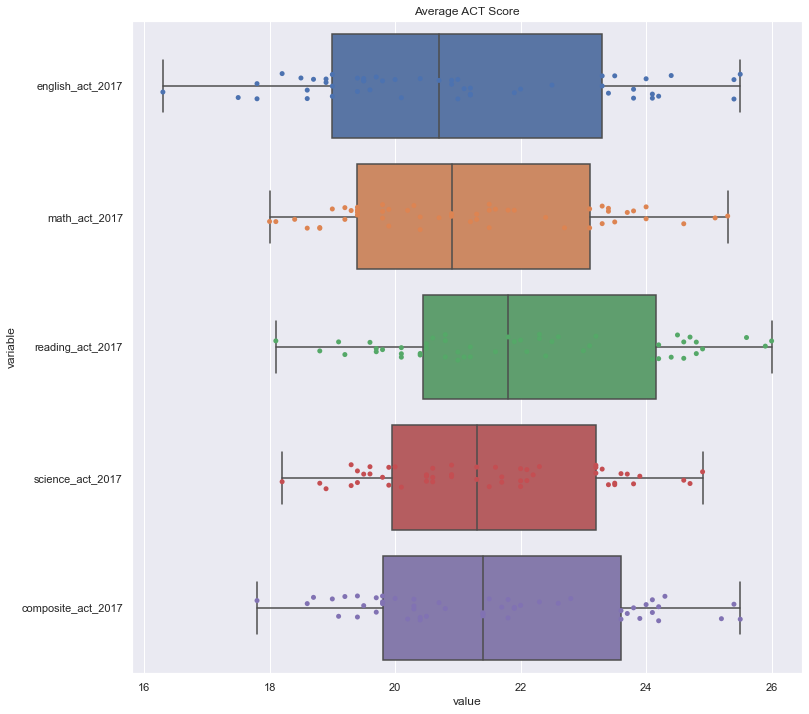

In [256]:
filtered_col_act = [col for col in final.columns if ('act' not in col) or ('part' in col) or ('2018' in col)] 
# filtered_col_act
melted_act = pd.melt(final, id_vars=filtered_col_act)
# melted_act['variable']
custom_boxplot(melted_act, melted_act['variable'], melted_act['value'], 'Average ACT Score')

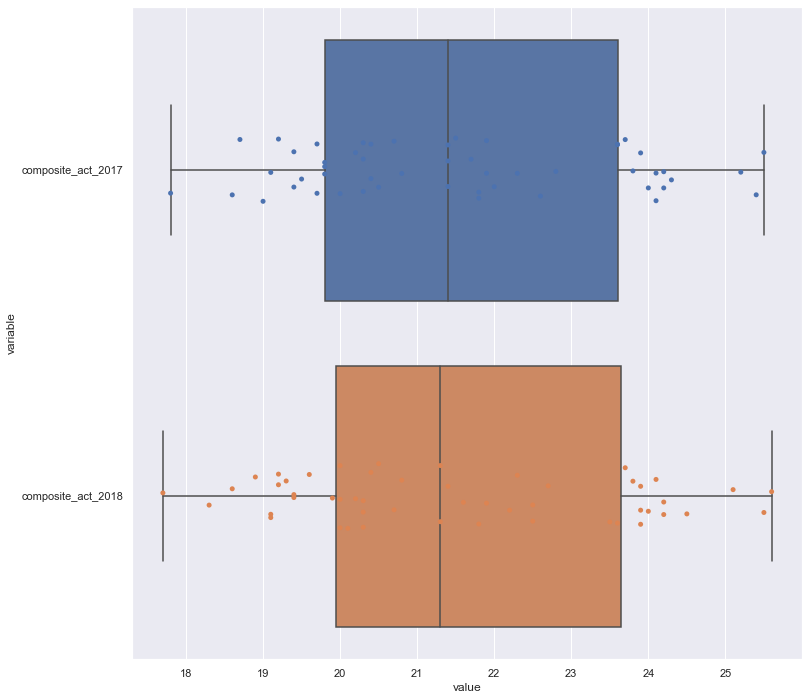

In [230]:
filtered_col_act_composite = [col for col in final.columns if ('act' not in col) or ('composite' not in col)] 
# filtered_col_act
melted_act_composite = pd.melt(final, id_vars=filtered_col_act_composite)
# melted_act
custom_boxplot(melted_act_composite, melted_act_composite['variable'], melted_act_composite['value'])

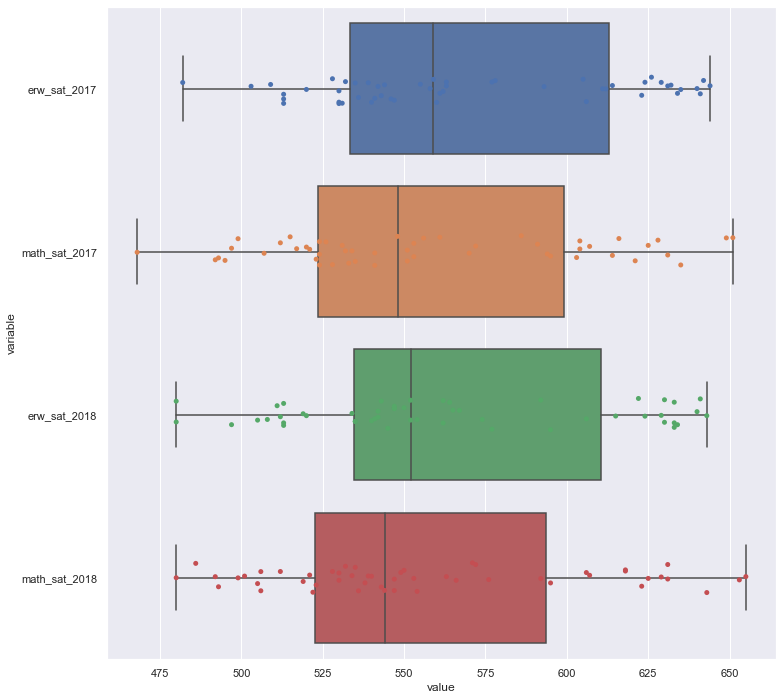

In [227]:
filtered_col_sat = [col for col in final.columns if ('sat' not in col) or ('part' in col) or ('total' in col)] 
# filtered_col_sat
melted_sat = pd.melt(final, id_vars=filtered_col_sat)
# # melted_act
custom_boxplot(melted_sat, melted_sat['variable'], melted_sat['value'])

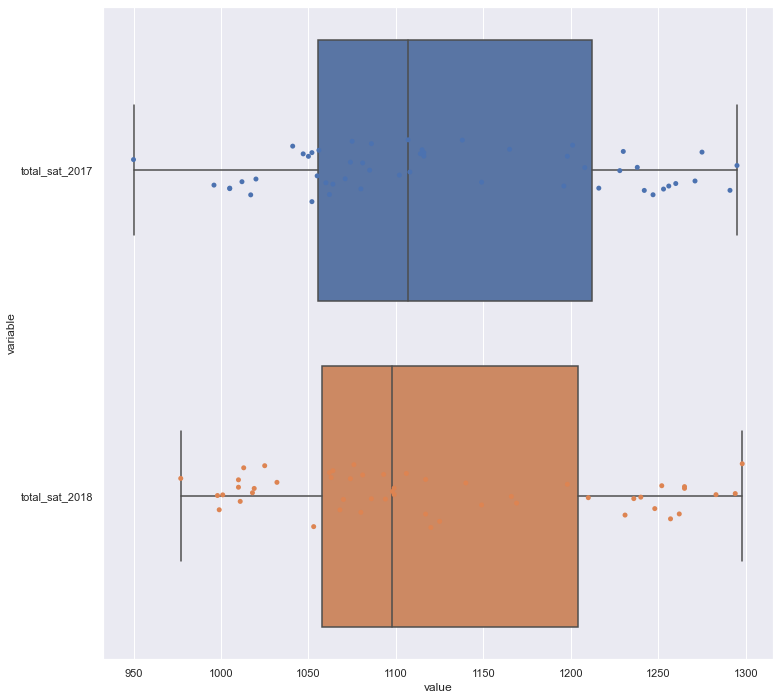

In [229]:
filtered_col_sat_total = [col for col in final.columns if ('sat' not in col) or ('total' not in col)] 
# filtered_col_sat_total
melted_sat_total = pd.melt(final, id_vars=filtered_col_sat_total)
# melted_act
custom_boxplot(melted_sat_total, melted_sat_total['variable'], melted_sat_total['value'])

In [263]:
final.columns

Index(['state', 'part_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'part_act_2018', 'composite_act_2018', 'part_sat_2017', 'erw_sat_2017',
       'math_sat_2017', 'total_sat_2017', 'part_sat_2018', 'erw_sat_2018',
       'math_sat_2018', 'total_sat_2018'],
      dtype='object')

<AxesSubplot:xlabel='part_act_2017', ylabel='composite_act_2017'>

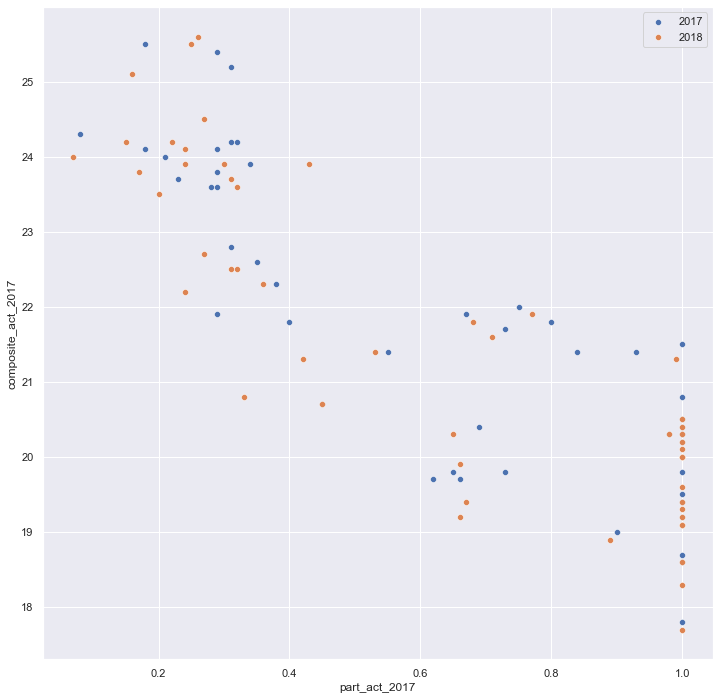

In [270]:
sns.scatterplot(
    data=final, 
    x='part_act_2017', 
    y='composite_act_2017',
#     hue='state'
    label='2017'
)
# plt.legend(final["state"],ncol = 3, bbox_to_anchor=(1.6, 1))
sns.scatterplot(
    data=final, 
    x='part_act_2018', 
    y='composite_act_2018',
#     hue='state'
    label='2018'
)

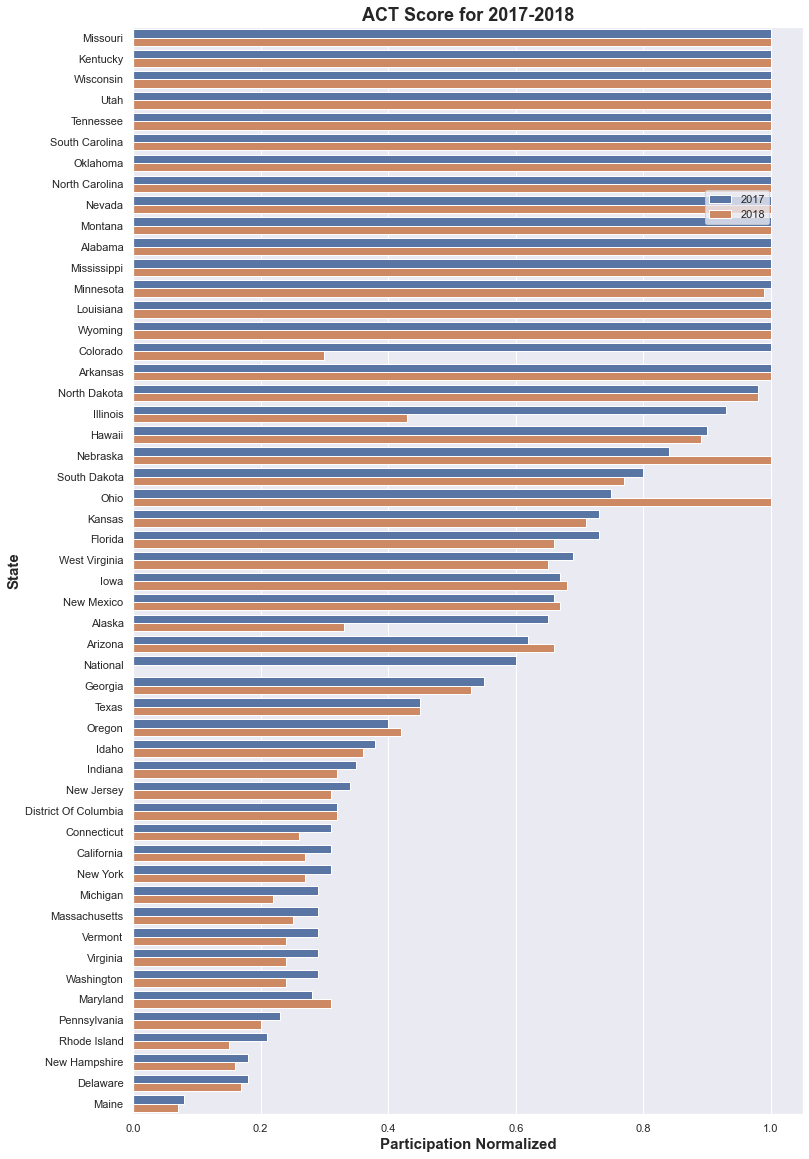

In [111]:
# Code

# # Line Graph

# # change the size of line graph
# sns.set(rc={'figure.figsize':(12,10)})
# # specify x and y axis data followed by data frame to plot from
# # hue arg can be added to add categories, style arg to change the style
# ax = sns.lineplot(x = 'Year', y = 'Participation decimal', data = result, hue='State', style='State')

# Bar Chart
sns.set(rc={'figure.figsize':(12,20)})
# set() to set title for the chart/plot

bar_act = sns.barplot(x = 'Participation Normalized', y = 'State', data = merged_act, hue='Year')
bar_act.set_title('ACT Score for 2017-2018',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar_act.set_xlabel(bar_act.get_xlabel(), fontsize=15, fontweight='bold')
bar_act.set_ylabel(bar_act.get_ylabel(), fontsize=15, fontweight='bold')
# change position of legend
# plt.legend(loc='center right', title='Year')
# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(0.95, 0.85), loc='upper right', borderaxespad=0)

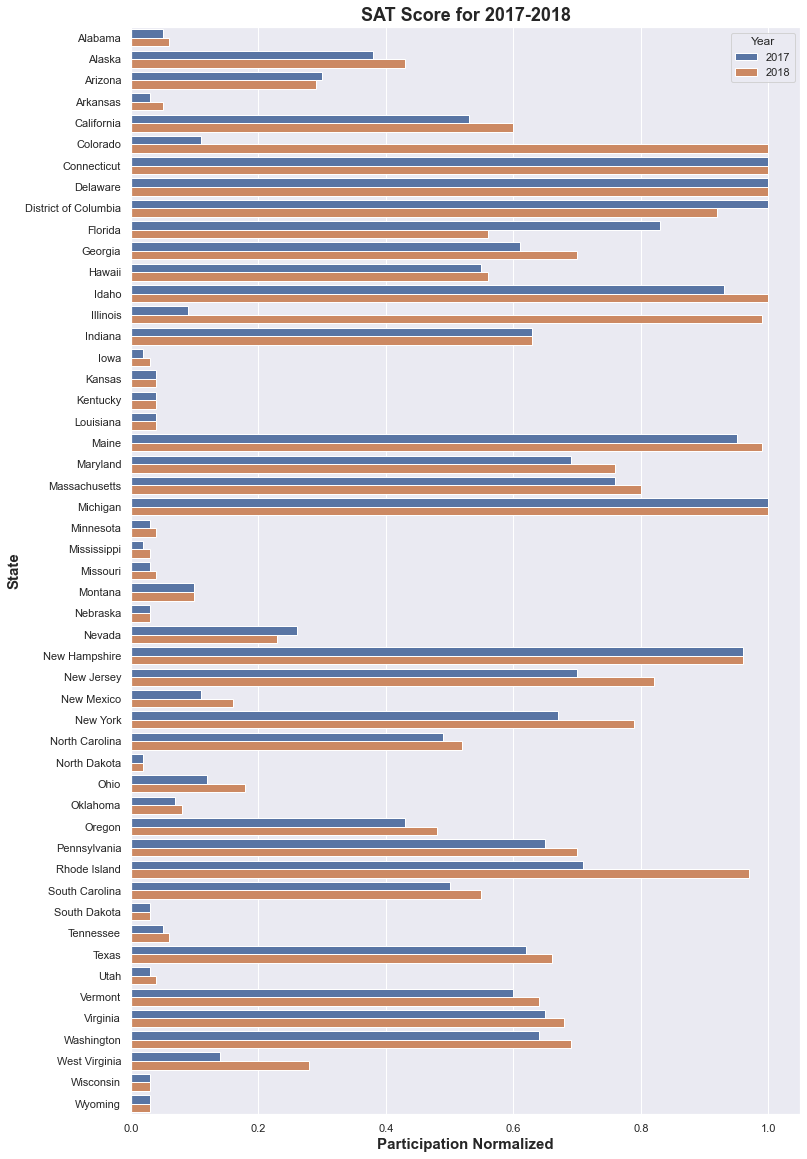

In [18]:
# Bar Chart
sns.set(rc={'figure.figsize':(12,20)})
bar_sat = sns.barplot(x = 'Participation Normalized', y = 'State', data = merged_sat, hue='Year')
bar_sat.set_title('SAT Score for 2017-2018',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar_sat.set_xlabel(bar_act.get_xlabel(), fontsize=15, fontweight='bold')
bar_sat.set_ylabel(bar_act.get_ylabel(), fontsize=15, fontweight='bold')
# change position of legend
plt.legend(loc='upper right', title='Year')
# place legend outside top right corner of plot
# plt.legend(bbox_to_anchor=(0.95, 0.85), loc='upper right', borderaxespad=0)

In [ ]:
# scatter plot
# data_sat_2017
# data_act_2017
# data_sat_2018
# data_act_2018
sns.set(rc={'figure.figsize':(18,18)})
scatter_plot = sns.scatterplot(x ='Participation Normalized' , y = 'Participation Normalized', data = merged_act, hue='Year', style='State')
# merged_act.loc[merged_act['Year'] == 2017, 'Participation Normalized']
# plt.legend(loc='upper right', ncol=3)
plt.legend(bbox_to_anchor=(0.95, 0.85), loc='upper right', borderaxespad=0, )

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!